# Load Data 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime

In [2]:
# import nyt files 
df_1 = pd.read_csv('df_1.csv')
df_2 = pd.read_csv('df_2.csv')
df_3 = pd.read_csv('df_3.csv')
df_4 = pd.read_csv('df_4.csv')
df_5 = pd.read_csv('df_5.csv')
df_6 = pd.read_csv('df_6.csv')
df_7 = pd.read_csv('df_7.csv')
df_8 = pd.read_csv('df_8.csv')
df_9 = pd.read_csv('df_9.csv')
df_10 = pd.read_csv('df_10.csv')
df_11 = pd.read_csv('df_11.csv')



In [3]:
#import sp500 file 
sp500 = pd.read_csv('sp500.csv')

In [4]:
# Make sure all dataframes have same columns 
set(df_2.columns) == set(df_1.columns)== set(df_3.columns)== set(df_4.columns)== set(df_5.columns)== set(df_6.columns)== set(df_7.columns)== set(df_8.columns)== set(df_9.columns)== set(df_10.columns)== set(df_11.columns)

True

In [5]:
# combine nyt files into single dataframe 
dfs = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11]
articles_df = pd.concat(dfs,ignore_index=True)

In [6]:
articles_df.columns

Index(['Unnamed: 0', 'abstract', 'web_url', 'snippet', 'lead_paragraph',
       'source', 'multimedia', 'headline', 'keywords', 'pub_date',
       'document_type', 'news_desk', 'section_name', 'subsection_name',
       'byline', 'type_of_material', '_id', 'word_count', 'uri',
       'print_section', 'print_page'],
      dtype='object')

In [7]:
# drop articles with same lead paragraph since that is what we are going to using to modeling 
articles_df= articles_df.drop_duplicates(subset='lead_paragraph')

In [8]:
articles_df.shape

(19397, 21)

# Combine dataframes

In [9]:
# how to convert sp500 effective date to datetime date 
datetime.datetime.strptime(sp500['Effective date '][0],'%m/%d/%Y')

datetime.datetime(2011, 7, 29, 0, 0)

In [10]:
# how to convert sp500 effective date to datetime date 
datetime.datetime.date(datetime.datetime.strptime(sp500['Effective date '][0],'%m/%d/%Y'))

datetime.date(2011, 7, 29)

In [11]:
articles_df['pub_date'][0].split()[0]

'2021-08-17'

In [12]:
# how to convert articles pub_date to datetime 
datetime.datetime.date(datetime.datetime.strptime(articles_df['pub_date'][0].split()[0],'%Y-%m-%d'))

datetime.date(2021, 8, 17)

In [13]:
# update values in pub_date 
articles_df['date']= articles_df['pub_date'].apply(lambda x:datetime.datetime.date(datetime.datetime.strptime(x.split()[0],'%Y-%m-%d')) )

In [14]:
# update values in sp500 
sp500['date']= sp500['Effective date '].apply(lambda x:datetime.datetime.date(datetime.datetime.strptime(x,'%m/%d/%Y')) )

In [15]:
# combine articles and sp500 
data = articles_df.set_index('date').join(sp500.set_index('date'))

In [16]:
data.columns

Index(['Unnamed: 0', 'abstract', 'web_url', 'snippet', 'lead_paragraph',
       'source', 'multimedia', 'headline', 'keywords', 'pub_date',
       'document_type', 'news_desk', 'section_name', 'subsection_name',
       'byline', 'type_of_material', '_id', 'word_count', 'uri',
       'print_section', 'print_page', 'Effective date ', 'S&P 500'],
      dtype='object')

In [17]:
# drop duplicate entries for date 
data.drop(columns=['Effective date ','pub_date'],inplace=True)

In [18]:
data.head()

,Unnamed: 0,abstract,web_url,snippet,lead_paragraph,source,multimedia,headline,keywords,document_type,...,section_name,subsection_name,byline,type_of_material,_id,word_count,uri,print_section,print_page,S&P 500
date,,,,,,,,,,,,,,,,,,,,,
2016-09-06,1984,"Pershing Square takes a 9.9 percent stake, mak...",https://www.nytimes.com/2016/09/07/business/de...,"Pershing Square takes a 9.9 percent stake, mak...",William A. Ackman has a craving for fast food.,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'William Ackman’s Pershing Square Tak...,"[{'name': 'persons', 'value': 'Ackman, William...",article,...,Business Day,DealBook,"{'original': 'By Leslie Picker', 'person': [{'...",News,nyt://article/37a6fa80-bd9a-5544-a632-a419069c...,474,nyt://article/37a6fa80-bd9a-5544-a632-a419069c...,B,2.0,2186.48
2016-09-06,1985,"Shareholders can be finicky and opaque, but th...",https://www.nytimes.com/2016/09/07/business/de...,"Shareholders can be finicky and opaque, but th...",Tesla Motors’ proposed acquisition of SolarCit...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Elon Musk’s Solar Vision, Up for a D...","[{'name': 'subject', 'value': 'Shareholder Rig...",article,...,Business Day,DealBook,"{'original': 'By Steven Davidoff Solomon', 'pe...",News,nyt://article/e29720d8-7852-537b-b6a0-b5b0ea09...,1276,nyt://article/e29720d8-7852-537b-b6a0-b5b0ea09...,B,3.0,2186.48
2016-09-06,1986,Delegates at symposium on economic crime in Ca...,https://www.nytimes.com/2016/09/07/business/de...,Delegates at symposium on economic crime in Ca...,"CAMBRIDGE, England — The record of combating e...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Law Enforcement ‘Not Winning’ War on...,"[{'name': 'subject', 'value': 'Legal Professio...",article,...,Business Day,DealBook,"{'original': 'By Anita Raghavan', 'person': [{...",News,nyt://article/6d1b2d0a-df42-5e08-8ca3-0e8ef6df...,838,nyt://article/6d1b2d0a-df42-5e08-8ca3-0e8ef6df...,NaN,NaN,2186.48
2016-09-06,1987,Recent commercial real estate transactions in ...,https://www.nytimes.com/2016/09/07/realestate/...,Recent commercial real estate transactions in ...,$11.57 MILLION,The New York Times,"[{'rank': 0, 'subtype': 'hpLarge', 'caption': ...",{'main': 'Recent Commercial Real Estate Transa...,"[{'name': 'subject', 'value': 'Real Estate and...",article,...,Real Estate,Commercial Real Estate,"{'original': 'By Rosalie R. Radomsky', 'person...",News,nyt://article/f6a562a2-f5df-5eb8-aecf-0f308c5f...,252,nyt://article/f6a562a2-f5df-5eb8-aecf-0f308c5f...,B,5.0,2186.48
2016-09-06,1988,A study of Australian women points to discrimi...,https://www.nytimes.com/2016/09/07/business/re...,A study of Australian women points to discrimi...,One common theory to explain the pay gap betwe...,The New York Times,"[{'rank': 0, 'subtype': 'hpLarge', 'caption': ...",{'main': 'Research Suggests Women Are Asking f...,"[{'name': 'subject', 'value': 'Women and Girls...",article,...,Business Day,NaN,"{'original': 'By Daniel Victor', 'person': [{'...",News,nyt://article/6f60e145-3333-5189-a741-50c81136...,548,nyt://article/6f60e145-3333-5189-a741-50c81136...,NaN,NaN,2186.48


Remove columns:
    - print_page : not revelent not what we are doing. not everything gets printed
    - print_section : not revelent not what we are doing. not everything gets printed
    - uri : looks like internal NYT thing 
    - '_id' : looks like internal NYT thing
    - Unnamed: 0 useless
    

# Go through all columns

In [19]:
# drop useless columns
data.drop(columns=['print_page','print_section','uri','_id','Unnamed: 0'],inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19397 entries, 2016-09-06 to 2021-08-17
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abstract          19397 non-null  object 
 1   web_url           19397 non-null  object 
 2   snippet           18799 non-null  object 
 3   lead_paragraph    19396 non-null  object 
 4   source            19397 non-null  object 
 5   multimedia        19397 non-null  object 
 6   headline          19397 non-null  object 
 7   keywords          19397 non-null  object 
 8   document_type     19397 non-null  object 
 9   news_desk         19397 non-null  object 
 10  section_name      19397 non-null  object 
 11  subsection_name   7743 non-null   object 
 12  byline            19397 non-null  object 
 13  type_of_material  19397 non-null  object 
 14  word_count        19397 non-null  int64  
 15  S&P 500           17160 non-null  float64
dtypes: float64(1), int64(1), object

## source

In [21]:
data['source'].value_counts(normalize=True)

The New York Times              0.998866
International New York Times    0.001134
Name: source, dtype: float64

In [22]:
data.drop(columns='source',inplace=True)

## multimedia 

In [23]:
pd.set_option('max_colwidth',None)
data[['multimedia']].head(1)

multimedia
date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [24]:
data.drop(columns='multimedia',inplace=True)

## news_desk

In [25]:
data['news_desk'].value_counts()

Business    19397
Name: news_desk, dtype: int64

In [26]:
# all the same so drop 
data.drop(columns='news_desk',inplace=True)

## byline

In [27]:
len(data['byline'].unique())

3097

3097 authors for all 21000 articles but not relevent for what we are doing 

In [28]:
data.drop(columns='byline',inplace=True)

## word_count 

number of words in article 

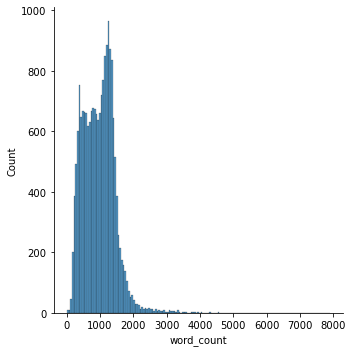

In [29]:
sns.displot(data=data,x='word_count',)

<AxesSubplot:xlabel='word_count', ylabel='S&P 500'>

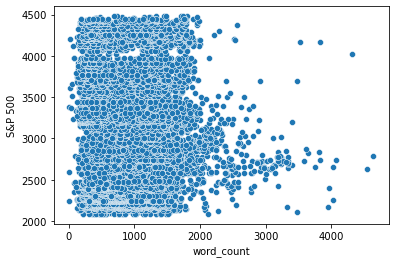

In [30]:
sns.scatterplot(x=data['word_count'],y=data['S&P 500'])

No real relationship not useful  

In [31]:
data.drop(columns='word_count',inplace=True)

## subsection_name

In [32]:
def missing_check(df):
    return df.isnull().sum()/len(df)

In [33]:
# percentage of missing values 
missing_check(data['subsection_name'])

0.6008145589524153

In [34]:
data['subsection_name'].value_counts()

DealBook                       2772
Media                          2344
Economy                        1188
Personal Tech                   391
Energy & Environment            352
Politics                        215
Commercial Real Estate          150
International Business           75
Entrepreneurship                 54
New Cars                         41
Wheels                           37
Asia Pacific                     28
Europe                           14
Retirement                        9
Paying for College                6
Television                        6
Asset Allocation                  5
Australia                         4
Stocks and Bonds                  3
Americas                          3
401(k)'s and Similar Plans        3
Taxes                             3
Automobiles                       3
Student Loans                     3
Middle East                       3
Identify Theft                    2
Credit and Debit Cards            2
Estate Planning             

60% missing values and rest mostly in two categories. 
Missing values not missing at random as they are just general business articles without particular subsections. 



In [35]:
data.drop(columns='subsection_name',inplace=True)

## document_type 

In [36]:
missing_check(data['document_type'])

0.0

In [37]:
data['document_type'].value_counts()

article    19397
Name: document_type, dtype: int64

- All results of same type so not useful 

In [38]:
data.drop(columns='document_type',inplace=True)

## section_name

In [39]:
missing_check(data['section_name'])

0.0

In [40]:
data['section_name'].value_counts(normalize=True)

Business Day       0.723823
Technology         0.191267
Your Money         0.040058
U.S.               0.013817
Real Estate        0.009589
Automobiles        0.005413
The Upshot         0.003299
World              0.003042
Smarter Living     0.001598
Health             0.001444
Fashion & Style    0.001134
Travel             0.001031
Arts               0.000928
Movies             0.000567
Books              0.000567
Climate            0.000567
Science            0.000464
Food               0.000309
Well               0.000309
Reader Center      0.000206
Times Insider      0.000155
New York           0.000155
Style              0.000103
Sports             0.000103
Admin              0.000052
Name: section_name, dtype: float64

Mostly in two categories. Not useful for what we are trying to do. 

In [41]:
data.drop(columns='section_name',inplace=True)

## type_of_material


In [42]:
data['type_of_material'].value_counts(normalize=True)

News             0.996804
News Analysis    0.002629
List             0.000412
Text             0.000103
Interview        0.000052
Name: type_of_material, dtype: float64

99% in one category --> not useful 

In [43]:
data.drop(columns='type_of_material',inplace=True)

## web_url

In [44]:
missing_check(data['web_url'])

0.0

No missing values we can leave as identifier 

In [45]:
# confirm all unique articles 
len(data['web_url'].unique()) == len(data['web_url'])

True

## abstract and snippet 

In [46]:
missing_check(data['abstract']),missing_check(data['snippet'])

(0.0, 0.030829509717997628)

In [47]:
pd.set_option('max_colwidth',None)

In [48]:
data[data['abstract']!= data['snippet']][['abstract','snippet']]

,abstract,snippet
date,,
2019-03-06,"Mr. Zuckerberg detailed plans to integrate Instagram, WhatsApp and Messenger so that people can communicate privately and directly across networks. The shift follows years of scandal for Facebook, which has been criticized over its handling of user data and the spread of disinformation.","Mr. Zuckerberg detailed plans to integrate Instagram, WhatsApp and Messenger so that people can communicate privately and directly across networks. The shift follows years of scandal for Facebook, which has been criticized over its handling of use..."
2019-11-10,"Who’s spying on you online? If you’re a Saudi dissident, it could be anyone — even a Twitter employee. But if you’re a child in China, it’s the government, which just passed new rules to stop minors from spending so much time on video games. Here’s everything you need to know about the week’s top stories in business and tech.",NaN
2020-07-07,United Airlines said on Tuesday that it was cutting back on the August flight schedule it announced just last week because travel demand was sliding again as coronavirus cases surged across much of the country.,NaN
2020-07-07,"Britons are in fields across the country doing something they probably would not have imagined a few months ago: working as farm laborers, picking berries.",NaN
2020-07-08,"Stocks on Wall Street dipped on Tuesday, cooling off after a five-day rally, as new economic data for Europe forecast a grim outlook for the year and cases of Covid-19 continued to spread.",NaN
...,...,...
2021-07-13,"Investors are increasingly eyeing the creator economy — the huge, largely unexplored market of providing digital tools to influencers and helping them run their businesses.",NaN
2021-07-14,"Americans get millions of illegal robocalls every month, despite attempts by the telecommunications industry and government agencies to stop them.",NaN
2021-07-29,"Nothing demonstrated the horrors of the coronavirus contagion in the early stages of the pandemic like the major outbreaks onboard cruise ships, when vacation selfies abruptly turned into grim journals of endless days spent confined to cabins as the virus raged, eventually infecting thousands of people on board, and killing more than 100.",NaN


In [49]:
data[data['abstract']!= data['snippet']][['abstract','snippet']].isnull().sum()

abstract      0
snippet     598
dtype: int64

In [50]:
601/len(data)

0.030984172810228385

Only two articles have both abstract and snippet (non-null) that is different. 

snippet does not provide new information so we can drop it 

In [51]:
data.drop(columns='snippet',inplace=True)

## lead_paragraph


In [52]:
# see if abstract and lead_paragraph provide same information.
data[['abstract','lead_paragraph']]

,abstract,lead_paragraph
date,,
2016-09-06,"Pershing Square takes a 9.9 percent stake, making it the second-largest holder after Fidelity. Shares rose in after-hours trading.",William A. Ackman has a craving for fast food.
2016-09-06,"Shareholders can be finicky and opaque, but the Tesla-SolarCity deal shows the importance of having all buyers of significant assets hold a vote.",Tesla Motors’ proposed acquisition of SolarCity is most likely to come down to whether shareholders support Elon Musk in his vision of creating a solar power juggernaut. Yet the deal also raises broader issues of how and when shareholders should vote to approve acquisitions.
2016-09-06,"Delegates at symposium on economic crime in Cambridge, Mass., sought solutions for fighting crimes like money laundering, fraud and insider trading.","CAMBRIDGE, England — The record of combating economic crime is so woeful that governments need a new approach. That was the view of many at a gathering of about 1,600 delegates from academia and the legal and compliance profession here on Monday."
2016-09-06,Recent commercial real estate transactions in New York City.,$11.57 MILLION
2016-09-06,"A study of Australian women points to discrimination as a cause of a pay gap, with men getting raises 20 percent of the time they asked, compared with 16 percent for women.",One common theory to explain the pay gap between men and women assigns blame to women themselves: Maybe they just aren’t asking for raises.
...,...,...
2021-08-17,News of Xu Jiayin’s departure sent Evergrande’s shares tumbling and was another sign of Beijing’s efforts to rein in corporate debt.,"The billionaire founder of Evergrande, China’s most indebted property developer, has stepped down from his position as chairman of the company’s main real estate arm, Hengda Real Estate Group, according to a notice filed to a government website on Tuesday."
2021-08-17,The 1.1 percent decline was sharper than economists had expected and came as sales of cars and home goods dropped.,"Retail sales dropped in July, the Commerce Department reported Tuesday, a sign that consumer spending was hampered amid an uneven economic recovery from pandemic-induced restrictions."
2021-08-17,"Jerome H. Powell’s term as chair of the Federal Reserve ends in February. Slots for the vice chair and the Fed’s top bank regulator will also be up for grabs soon, and a position on the Fed’s Board of Governors is already vacant.","Jerome H. Powell’s term as chair of the Federal Reserve ends in February. Slots for the vice chair and the Fed’s top bank regulator will also be up for grabs soon, and a position on the Fed’s Board of Governors is already vacant."


Looks like lead paragraph provide different information about the same thing. This will give us more relevent text to work. 

We can consider combining the two relevent text fields into a single column for simplicity.  

In [53]:
data['text']= data['abstract']+ data['lead_paragraph']

In [54]:
# drop abstract and lead_paragraph 
data.drop(columns=['abstract','lead_paragraph'],inplace=True)

As a human reading the first text field does not provide me enough information to know what is happening. If we can get keywords into the same text field it should give it much more meaning. 

## keywords

In [55]:
# unique entries for keywords 
len(data['keywords'].value_counts())

18372

In [56]:
data['keywords'][0]

"[{'name': 'persons', 'value': 'Ackman, William A', 'rank': 2, 'major': 'N'}, {'name': 'organizations', 'value': 'Chipotle Mexican Grill Inc', 'rank': 3, 'major': 'N'}, {'name': 'subject', 'value': 'Fast Food Industry', 'rank': 4, 'major': 'N'}, {'name': 'organizations', 'value': 'Pershing Square Holdings', 'rank': 5, 'major': 'N'}]"

In [57]:
#split using { start of dictionary 
data['keywords'][0].split("{")

['[',
 "'name': 'persons', 'value': 'Ackman, William A', 'rank': 2, 'major': 'N'}, ",
 "'name': 'organizations', 'value': 'Chipotle Mexican Grill Inc', 'rank': 3, 'major': 'N'}, ",
 "'name': 'subject', 'value': 'Fast Food Industry', 'rank': 4, 'major': 'N'}, ",
 "'name': 'organizations', 'value': 'Pershing Square Holdings', 'rank': 5, 'major': 'N'}]"]

In [58]:
# ignore first entry in list cause not keyword 
data['keywords'][0].split("{")[1:]

["'name': 'persons', 'value': 'Ackman, William A', 'rank': 2, 'major': 'N'}, ",
 "'name': 'organizations', 'value': 'Chipotle Mexican Grill Inc', 'rank': 3, 'major': 'N'}, ",
 "'name': 'subject', 'value': 'Fast Food Industry', 'rank': 4, 'major': 'N'}, ",
 "'name': 'organizations', 'value': 'Pershing Square Holdings', 'rank': 5, 'major': 'N'}]"]

In [59]:
# first entry in list 
data['keywords'][0].split("{")[1:][0]

"'name': 'persons', 'value': 'Ackman, William A', 'rank': 2, 'major': 'N'}, "

In [60]:
data['keywords'][0].split("{")[1:][0].split(",")

["'name': 'persons'",
 " 'value': 'Ackman",
 " William A'",
 " 'rank': 2",
 " 'major': 'N'}",
 ' ']

In [61]:
# 2nd method 
# referenced https://stackoverflow.com/questions/988228/convert-a-string-representation-of-a-dictionary-to-a-dictionary
import ast

In [62]:
values_list = ast.literal_eval("[{'name': 'persons', 'value': 'Ackman, William A', 'rank': 2, 'major': 'N'}, {'name': 'organizations', 'value': 'Chipotle Mexican Grill Inc', 'rank': 3, 'major': 'N'}, {'name': 'subject', 'value': 'Fast Food Industry', 'rank': 4, 'major': 'N'}, {'name': 'organizations', 'value': 'Pershing Square Holdings', 'rank': 5, 'major': 'N'}]")
values_list

[{'name': 'persons', 'value': 'Ackman, William A', 'rank': 2, 'major': 'N'},
 {'name': 'organizations',
  'value': 'Chipotle Mexican Grill Inc',
  'rank': 3,
  'major': 'N'},
 {'name': 'subject', 'value': 'Fast Food Industry', 'rank': 4, 'major': 'N'},
 {'name': 'organizations',
  'value': 'Pershing Square Holdings',
  'rank': 5,
  'major': 'N'}]

In [63]:
for value in values_list: 
    print(value['value'])

Ackman, William A
Chipotle Mexican Grill Inc
Fast Food Industry
Pershing Square Holdings


In [64]:
# helper function 
def grab_keywords(entry):
    'returns keywords as string from keyword entry for an article'
    result= ''
    entry_list= ast.literal_eval(entry)
    for value in entry_list:
        result += value['value'] + ' '
    return result.strip()
    

In [65]:
# test that the function works 
grab_keywords(data['keywords'][0])

'Ackman, William A Chipotle Mexican Grill Inc Fast Food Industry Pershing Square Holdings'

In [66]:
# make new column for topics using info from keywords 
data['topics']= data['keywords'].apply(grab_keywords)

In [67]:
# drop keyword column
data.drop(columns='keywords',inplace=True)

QUESTION: Should we add topics to the text column or keep it seperate?
    - If we add it then it makes the text column less like actual sentences. May make it harder for model to understand? May it eaiser for model to understand? 
    

## headline 

In [68]:
data['headline'].head()

date
2016-09-06     {'main': 'William Ackman’s Pershing Square Takes a Stake in Chipotle', 'kicker': None, 'content_kicker': None, 'print_headline': 'Pershing Square Capital Takes a Stake in Chipotle', 'name': None, 'seo': None, 'sub': None}
2016-09-06    {'main': 'Elon Musk’s Solar Vision, Up for a Dicey Vote', 'kicker': 'Deal Professor', 'content_kicker': None, 'print_headline': 'An Entrepreneur’s Solar Vision, Up for a Dicey Vote', 'name': None, 'seo': None, 'sub': None}
2016-09-06                                                       {'main': 'Law Enforcement ‘Not Winning’ War on White-Collar Crime', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}
2016-09-06                                                          {'main': 'Recent Commercial Real Estate Transactions', 'kicker': None, 'content_kicker': None, 'print_headline': 'Transactions', 'name': None, 'seo': None, 'sub': None}
2016-09-06                                     

Extract main since print headline will only exist if it was printed? 


In [69]:
data['headline'][0]

"{'main': 'William Ackman’s Pershing Square Takes a Stake in Chipotle', 'kicker': None, 'content_kicker': None, 'print_headline': 'Pershing Square Capital Takes a Stake in Chipotle', 'name': None, 'seo': None, 'sub': None}"

In [70]:
ast.literal_eval(data['headline'][0])# ['main']

{'main': 'William Ackman’s Pershing Square Takes a Stake in Chipotle',
 'kicker': None,
 'content_kicker': None,
 'print_headline': 'Pershing Square Capital Takes a Stake in Chipotle',
 'name': None,
 'seo': None,
 'sub': None}

In [71]:
# helper function 
def grab_headline(entry):
    'returns main headline from headline column for a single entry'
    return ast.literal_eval(entry)['main']

     

In [72]:
# test that the function works 
grab_headline(data['headline'][0])

'William Ackman’s Pershing Square Takes a Stake in Chipotle'

In [73]:
# grab headline for each entry in sample 
data['headline']= data['headline'].apply(grab_headline)

In [74]:
# add headline to front of text column for each observation 
data['text']= data['headline'] +". "+ data['text']

In [75]:
# drop headline column 
data.drop(columns='headline',inplace=True)

## S&P 500 

In [76]:
data.rename(columns={'S&P 500':'sp500'},inplace=True)

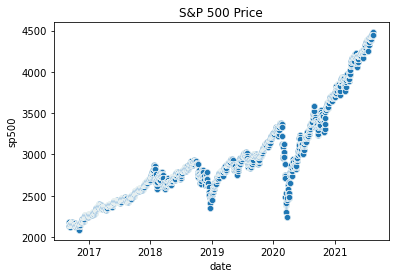

In [77]:
# sp500 over time in sample set
sns.scatterplot(x=data.index,y=data.sp500);
plt.title('S&P 500 Price');


- What to do with sp500?
    - keep as is? 
    - change to binary (0 went down, 1 went up) 
    - change to delta from previous day? 
    
- Need to deal with missing values     

###  impute nulls

In [78]:
data['sp500'].isnull().sum()

2237

we wont have data for weekends or holidays (days when market is closed) so impute price from previous day! 

In [79]:
# fill nulls with dummy value 
data['sp500'].fillna('replace',inplace=True) 

In [80]:
data.index

Index([2016-09-06, 2016-09-06, 2016-09-06, 2016-09-06, 2016-09-06, 2016-09-06,
       2016-09-06, 2016-09-06, 2016-09-06, 2016-09-06,
       ...
       2021-08-17, 2021-08-17, 2021-08-17, 2021-08-17, 2021-08-17, 2021-08-17,
       2021-08-17, 2021-08-17, 2021-08-17, 2021-08-17],
      dtype='object', name='date', length=19397)

In [81]:
# remove date from index for now 
data.reset_index(inplace=True)

In [82]:
# replace nulls with price from previous day 
for i in range(1,len(data)): # 
    if data.loc[i,'sp500']=='replace':
        data.loc[i,'sp500'] = data.loc[i-1,'sp500']
    
    

In [83]:
# make sure all replaced properly 
'replace' in set(data['sp500'])

False

In [84]:
# add date as index again 
data.set_index('date',inplace=True)

Thoughts: 
- ADD COLUMNS FOR HOLIDAY (if the day is a holiday),
- ADD COLUMNS FOR WEEKEND? to show model if it is weekend 
Alternatively:
- just leave date column and let the model learn that weekends the price does not change? 
    - should have enough datapoints for a model to learn the pattern of 5 weekdays of price change and 2 weekend days with no price change 
    - not sure if based on 10 years of data the model will be able to learn and predict when will be holidays? 
    

### change in price  

#### combine text from articles to single row 

In [85]:
data['sp500']

date
2016-09-06    2186.48
2016-09-06    2186.48
2016-09-06    2186.48
2016-09-06    2186.48
2016-09-06    2186.48
               ...   
2021-08-17    4448.08
2021-08-17    4448.08
2021-08-17    4448.08
2021-08-17    4448.08
2021-08-17    4448.08
Name: sp500, Length: 19397, dtype: object

- Approaches: 
    - combine all text from one day into a single column making a single entry for each day 
        - all articles from one day are one data point so ok to combine? 
        - have to decide if want to keep keywords: better to just add them to text 
    - dont combine? what value does seperate articles bring? 
        - model can take each article and weight them seperately and combine results to predict for day? vs doing it all at once? 
        - lost urls for articles? oh well 

In [86]:
test = data.copy()

In [87]:
data.columns

Index(['web_url', 'sp500', 'text', 'topics'], dtype='object')

In [88]:
# add topics to text column
test['text']= test['text']+ test['topics']

In [89]:
# drop web_urls 
test.drop(columns=['web_url','topics'],inplace=True)

In [90]:
test.head()

,sp500,text
date,,
2016-09-06,2186.48,"William Ackman’s Pershing Square Takes a Stake in Chipotle. Pershing Square takes a 9.9 percent stake, making it the second-largest holder after Fidelity. Shares rose in after-hours trading.William A. Ackman has a craving for fast food.Ackman, William A Chipotle Mexican Grill Inc Fast Food Industry Pershing Square Holdings"
2016-09-06,2186.48,"Elon Musk’s Solar Vision, Up for a Dicey Vote. Shareholders can be finicky and opaque, but the Tesla-SolarCity deal shows the importance of having all buyers of significant assets hold a vote.Tesla Motors’ proposed acquisition of SolarCity is most likely to come down to whether shareholders support Elon Musk in his vision of creating a solar power juggernaut. Yet the deal also raises broader issues of how and when shareholders should vote to approve acquisitions.Shareholder Rights and Activism Mergers, Acquisitions and Divestitures Tesla Motors Inc SolarCity Inc Musk, Elon Solar Energy"
2016-09-06,2186.48,"Law Enforcement ‘Not Winning’ War on White-Collar Crime. Delegates at symposium on economic crime in Cambridge, Mass., sought solutions for fighting crimes like money laundering, fraud and insider trading.CAMBRIDGE, England — The record of combating economic crime is so woeful that governments need a new approach. That was the view of many at a gathering of about 1,600 delegates from academia and the legal and compliance profession here on Monday.Legal Profession Frauds and Swindling"
2016-09-06,2186.48,Recent Commercial Real Estate Transactions. Recent commercial real estate transactions in New York City.$11.57 MILLIONReal Estate and Housing (Residential) Real Estate (Commercial) Renting and Leasing (Real Estate)
2016-09-06,2186.48,"Research Suggests Women Are Asking for Raises, but Men Get Them More. A study of Australian women points to discrimination as a cause of a pay gap, with men getting raises 20 percent of the time they asked, compared with 16 percent for women.One common theory to explain the pay gap between men and women assigns blame to women themselves: Maybe they just aren’t asking for raises.Women and Girls Wages and Salaries Discrimination Cass Business School University of Warwick University of Wisconsin Obama, Barack Australia United States Goodall, Amanda H"


In [91]:
# take out date from index to make manipulation easier
test.reset_index(inplace=True)

In [92]:
test.head()

,date,sp500,text
0,2016-09-06,2186.48,"William Ackman’s Pershing Square Takes a Stake in Chipotle. Pershing Square takes a 9.9 percent stake, making it the second-largest holder after Fidelity. Shares rose in after-hours trading.William A. Ackman has a craving for fast food.Ackman, William A Chipotle Mexican Grill Inc Fast Food Industry Pershing Square Holdings"
1,2016-09-06,2186.48,"Elon Musk’s Solar Vision, Up for a Dicey Vote. Shareholders can be finicky and opaque, but the Tesla-SolarCity deal shows the importance of having all buyers of significant assets hold a vote.Tesla Motors’ proposed acquisition of SolarCity is most likely to come down to whether shareholders support Elon Musk in his vision of creating a solar power juggernaut. Yet the deal also raises broader issues of how and when shareholders should vote to approve acquisitions.Shareholder Rights and Activism Mergers, Acquisitions and Divestitures Tesla Motors Inc SolarCity Inc Musk, Elon Solar Energy"
2,2016-09-06,2186.48,"Law Enforcement ‘Not Winning’ War on White-Collar Crime. Delegates at symposium on economic crime in Cambridge, Mass., sought solutions for fighting crimes like money laundering, fraud and insider trading.CAMBRIDGE, England — The record of combating economic crime is so woeful that governments need a new approach. That was the view of many at a gathering of about 1,600 delegates from academia and the legal and compliance profession here on Monday.Legal Profession Frauds and Swindling"
3,2016-09-06,2186.48,Recent Commercial Real Estate Transactions. Recent commercial real estate transactions in New York City.$11.57 MILLIONReal Estate and Housing (Residential) Real Estate (Commercial) Renting and Leasing (Real Estate)
4,2016-09-06,2186.48,"Research Suggests Women Are Asking for Raises, but Men Get Them More. A study of Australian women points to discrimination as a cause of a pay gap, with men getting raises 20 percent of the time they asked, compared with 16 percent for women.One common theory to explain the pay gap between men and women assigns blame to women themselves: Maybe they just aren’t asking for raises.Women and Girls Wages and Salaries Discrimination Cass Business School University of Warwick University of Wisconsin Obama, Barack Australia United States Goodall, Amanda H"


In [93]:
dates = dict()
for i in range(len(test)):
    if test.loc[i,'date'] in dates.keys(): # if already in dates dict 
        dates[test.loc[i,'date']] += ' ' + str(test.loc[i,'text'])
    else: 
        dates[test.loc[i,'date']] = test.loc[i,'text']
    
        
        

In [94]:
# make dates dict into dataframe
daily = pd.DataFrame(list(dates.items()),columns=['date','text'])

In [95]:
sp500.set_index('date',inplace=True)

In [99]:
# get sp500 price for every date in daily 
for i in range(len(daily)):
    day= daily.loc[i,'date']
    if day in set(sp500.index):
        daily.loc[i,'price'] = sp500.loc[day,'S&P 500']
    else: 
        daily.loc[i,'price']= 'replace'
    

In [100]:
daily['price']

0       2186.48
1       2186.16
2        2181.3
3       2127.81
4       replace
         ...   
1785     4468.0
1786    replace
1787    replace
1788    4479.71
1789    4448.08
Name: price, Length: 1790, dtype: object

In [101]:
# update replace to price from previous day 
for i in range(len(daily)):
    if daily.loc[i,'price']=='replace':
        daily.loc[i,'price']= daily.loc[i-1,'price']

In [102]:
# confirm updated 
'replace' in set(daily['price'])

False

In [103]:
daily.columns

Index(['date', 'text', 'price'], dtype='object')

#### column for change in price  

In [104]:
daily['price']

0       2186.48
1       2186.16
2        2181.3
3       2127.81
4       2127.81
         ...   
1785     4468.0
1786     4468.0
1787     4468.0
1788    4479.71
1789    4448.08
Name: price, Length: 1790, dtype: object

In [109]:
change=['first']
for i in range(1,len(daily)):
    change.append(100*(daily.loc[i,'price']-daily.loc[i-1,'price'])/daily.loc[i-1,'price'])
daily['change_percent']=change    

- change = percentage change in price from yesterday 

In [110]:
daily[['price','change_percent']]

,price,change_percent
0,2186.48,first
1,2186.16,-0.014635
2,2181.3,-0.222308
3,2127.81,-2.452207
4,2127.81,0.0
...,...,...
1785,4468.0,0.160732
1786,4468.0,0.0
1787,4468.0,0.0
1788,4479.71,0.262086


In [111]:
# add column for type of change_type 
change_type=['first']
for i in range(1,len(daily)):
    if daily.loc[i,'change_percent']>0: change_type.append('up')
    elif daily.loc[i,'change_percent']<0: change_type.append('down')
    else: change_type.append('same')
daily['change_type']= change_type

In [112]:
daily[['price','change_percent','change_type']]

,price,change_percent,change_type
0,2186.48,first,first
1,2186.16,-0.014635,down
2,2181.3,-0.222308,down
3,2127.81,-2.452207,down
4,2127.81,0.0,same
...,...,...,...
1785,4468.0,0.160732,up
1786,4468.0,0.0,same
1787,4468.0,0.0,same
1788,4479.71,0.262086,up


In [115]:
# get rid of first value in sample 
daily= daily.loc[1:,]

In [116]:
daily['change_type'].value_counts(normalize=True)

up      0.390162
down    0.305198
same    0.304639
Name: change_type, dtype: float64

Roughly even split! 

In [117]:
daily.to_csv('daily.csv')

In [120]:
daily.columns

Index(['date', 'text', 'price', 'change_percent', 'change_type'], dtype='object')

<AxesSubplot:xlabel='date', ylabel='change_percent'>

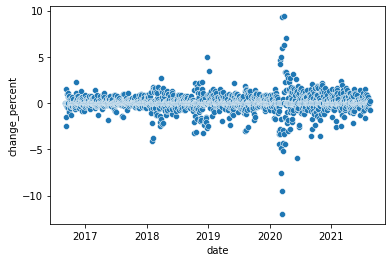

In [121]:
sns.scatterplot(x=daily['date'],y=daily['change_percent'])

Usually not more then a few percentage points in either direction with some outliers 